In [65]:
# import the necessary packages

# for the lbp
from skimage import feature
import matplotlib.pyplot as plt
import numpy as np
import argparse
import cv2
from PIL import Image

In [66]:
def resizeImage(image):
    (h, w) = image.shape[:2]

    width = 360  #  This "width" is the width of the resize`ed image
    # calculate the ratio of the width and construct the
    # dimensions
    ratio = width / float(w)
    dim = (width, int(h * ratio))
    resized = cv2.resize(image, dim, interpolation=cv2.INTER_AREA)
    return resized

360 360


True

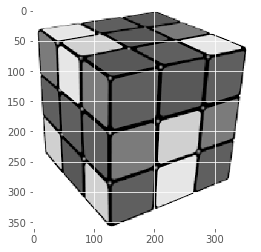

In [68]:
image = cv2.imread("cubes.png")
#image = imutils.resize(image, width=image.shape[1] * 2, inter=cv2.INTER_CUBIC)

# 2 resize the image
image = resizeImage(image)
(h, w) = image.shape[:2]
print(h, w)
cellSize = h/10

# 3 convert the image to grayscale and show it
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

plt.imshow(gray, cmap='gray')
#plt.title('gray'), plt.xticks([]), plt.yticks([])

cv2.imwrite("results/gray_resized_image.png", gray)

True

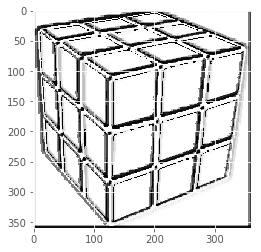

In [69]:
# plot a histogram of the LBP features and show it

# displaying default to make cool image
features = feature.local_binary_pattern(gray, 10, 5, method="default") # method="uniform")
plt.imshow(features, cmap='gray')
# Save figure of lbp_image
cv2.imwrite("results/lbp_image.png", features.astype("uint8"))

/Users/luciano/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


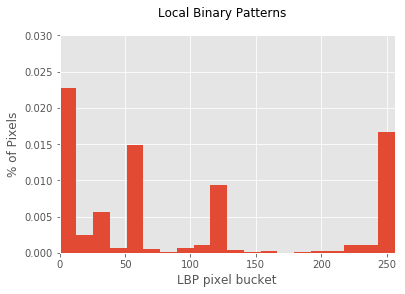

In [70]:
# construct the figure
plt.style.use("ggplot")
(fig, ax) = plt.subplots()
fig.suptitle("Local Binary Patterns")
plt.ylabel("% of Pixels")
plt.xlabel("LBP pixel bucket")

ax.hist(features.ravel(), normed=True, bins=20, range=(0, 256))
ax.set_xlim([0, 256])
ax.set_ylim([0, 0.030])
# save figure
fig.savefig('results/lbp_histogram.png')   # save the figure to file
plt.show()